<a href="https://colab.research.google.com/github/noelidematos/noelidematos/blob/main/An%C3%A1l%C3%ADse_SuperLoja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
A análise abaixo foi feita utilizando dados do site: https://www.kaggle.com/datasets

O objetivo desta análise é entender o perfil do consumidor ,lucratividade e responder algumas questões de negócio:
  
* Vendas por categoria ?
* Qual modo de envio que é mais escolhido?
* Qual são produtos mais vendidos?
* Qual região possui o maior valor de vendas ?
* Maior e menor lucro por segmento?
* Maior e menor lucro baseado nos produtos?
* Qual a prioridade de ordem para cada subcategoria?







   



# Importando as bibliotecas que serão utilizadas

In [ ]:
#Importando as bibliotecas que seram usadas no projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
#importando o dataset
dfLoja= pd.read_excel('/content/Global_Superstore2.xlsx')

FileNotFoundError: ignored

In [ ]:
#exibindo as 5 primeiras linhas do dataset
dfLoja.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# O método info() imprime informações sobre o DataFrame
#como número de colunas,rótulos de coluna,tipos de dados da coluna,uso de memória
#indice de intervalo e o número de células em cada coluna(valores não nulos)
dfLoja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
# O nome das colunas foi modificado  o intuito é facilitar o entendimento.
dfLoja.rename( columns= { "Row ID":"ID da Linha",
           "Order ID":"ID do Pedido",
           "Order Date":"Data do Pedido",
           "Ship Date":"Data de envio",
           "Ship Mode":"Modo de envio",
           "Customer ID ":"Identificação do Cliente",
           "Customer Name":"Nome do Cliente",
           "Segment":"Segmento",
           "City": "Cidade",
           "State":"Estado",
           "Country":"Pais",
           "Postal Code":"Código Postal",
           "Market":"Mercado",
           "Region":"Região",
           "Product ID":"ID do Produto",
           "Category":"Categoria",
           "Sub-Category":"Subcategoria",
           "Product Name":"Nome do Produto",
           "Sales":"Vendas",
            "Quantity":"Quantidade",
            "Discount":"Desconto",
           "Profit":"Lucro",
           "Shipping Cost":"Frete",
           "Order Priority":"Ordem Prioritária"
             },inplace=True)

In [ ]:
# visualizando se foi modificado
dfLoja.head(5)

,ID da Linha,ID do Pedido,Data do Pedido,Data de envio,Modo de envio,Customer ID,Nome do Cliente,Segmento,Cidade,Estado,...,ID do Produto,Categoria,Subcategoria,Nome do Produto,Vendas,Quantidade,Desconto,Lucro,Frete,Ordem Prioritária
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# O método isnull( ) verifica se o valor é NAN ou não,combinando esse método junto com a
# função sum( ), permite uma verificação de quantos dados NAN possuimos por coluna.
dfLoja.isnull().sum()

ID da Linha              0
ID do Pedido             0
Data do Pedido           0
Data de envio            0
Modo de envio            0
Customer ID              0
Nome do Cliente          0
Segmento                 0
Cidade                   0
Estado                   0
Pais                     0
Código Postal        41296
Mercado                  0
Região                   0
ID do Produto            0
Categoria                0
Subcategoria             0
Nome do Produto          0
Vendas                   0
Quantidade               0
Desconto                 0
Lucro                    0
Frete                    0
Ordem Prioritária        0
dtype: int64

In [ ]:
#Removendo os valores NAN
dfLoja.dropna(how='any',inplace=True)
dfLoja.shape

(9994, 24)

In [ ]:
dfLoja.isnull().sum()

ID da Linha          0
ID do Pedido         0
Data do Pedido       0
Data de envio        0
Modo de envio        0
Customer ID          0
Nome do Cliente      0
Segmento             0
Cidade               0
Estado               0
Pais                 0
Código Postal        0
Mercado              0
Região               0
ID do Produto        0
Categoria            0
Subcategoria         0
Nome do Produto      0
Vendas               0
Quantidade           0
Desconto             0
Lucro                0
Frete                0
Ordem Prioritária    0
dtype: int64

In [ ]:
# utilizando o método Describe()  nos mostra uma estatistica do conjunto de dados,das colunas númericas
dfLoja.describe()

,ID da Linha,Código Postal,Vendas,Quantidade,Desconto,Lucro,Frete
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36293.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,23.831678
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,58.962848
min,31297.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,33795.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,1.490000
50%,36293.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,38791.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,19.985000
max,41290.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000


In [ ]:
#Estatística descritiva apenas da coluna Vendas
dfLoja['Vendas'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Vendas, dtype: float64

Insights sobre o negócio

Conseguimos através do gráfico indentificar que os volumes de compras são maiores na categoria Office Supplies do que nas outras duas categorias

In [ ]:
fig_size = (16,8)
font_size = 16
title_font_size = 20

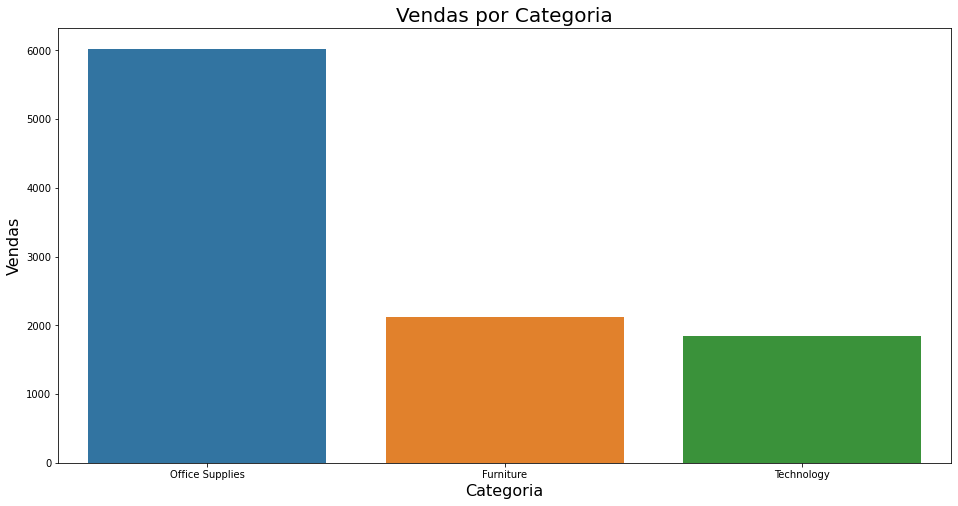

In [ ]:
# definição do gráfico de barras
fig = plt.figure(figsize = fig_size)

sns.barplot(x = dfLoja.Categoria.value_counts().index[:3],
            y = dfLoja.Categoria.value_counts()[:3])

# definição dos nomes dos eixos e título
plt.xlabel('Categoria', fontsize = font_size)
plt.ylabel('Vendas', fontsize = font_size)
plt.title('Vendas por Categoria', fontsize = title_font_size)

plt.show()

Histogramas são muito importantes, principalmente no contexto de análise de dados e inteligência artificial. Um histograma nada mais é que um gráfico de barras, onde a altura de cada barra representa o número de vezes que determinado valor foi observado.

 Insights sobre o negócio

Modo de envio standard class é o tem mais preferência


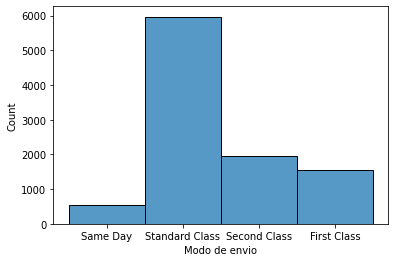

In [ ]:
sns.histplot( x='Modo de envio', data=dfLoja)
#plt.xlim([0,2000])

Os 10 produtos mais comprados pelos clientes

In [ ]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

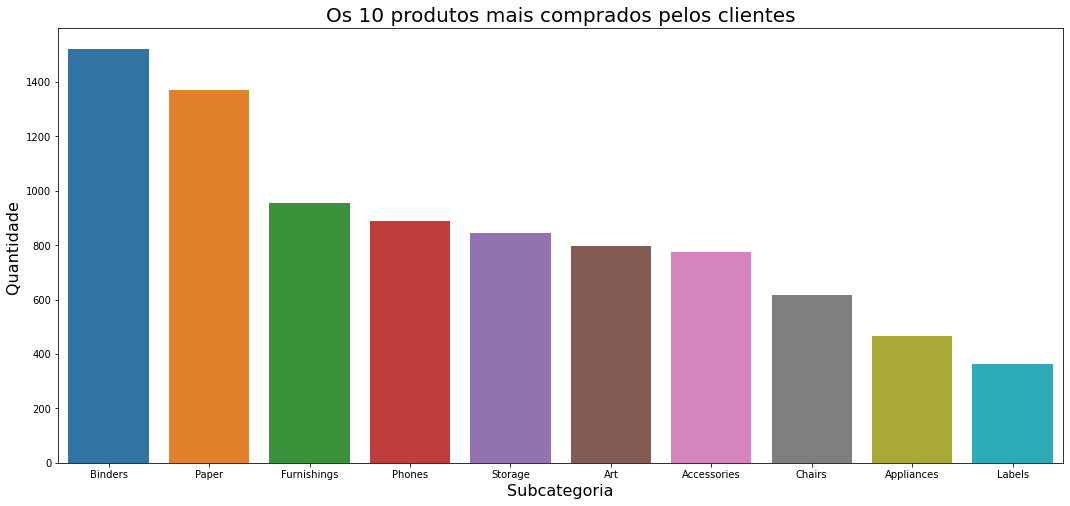

In [ ]:
# definição do gráfico de barras
fig = plt.figure(figsize = fig_size)

sns.barplot(x = dfLoja.Subcategoria.value_counts().index[:10],
            y = dfLoja.Subcategoria.value_counts()[:10])

# definição dos nomes dos eixos e título
plt.xlabel('Subcategoria', fontsize = font_size)
plt.ylabel('Quantidade ', fontsize = font_size)
plt.title("Os 10 produtos mais comprados pelos clientes", fontsize = title_font_size)

plt.show()

Insights sobre o negócio

Os principais itens comprados são da categoria de materiais de escritório.

Pasta (fichário)e papéis recebeu mais de 10 mil pedidos!

# Vendas por região

Insights sobre o negócio

A região Sul, é a que tem maior número de vendas,seguida pela região Leste, Oeste e Central.

A região Oeste tem menor número de vendas uma oportunidade de criar estratégias, focadas para essa região
vizando o aumento nas vendas.

In [ ]:
def bar_plot_df(x_var, y_var, title):
  # definição do gráfico de barras
  fig = plt.figure(figsize = fig_size)
  sns.barplot(x = x_var,
              y = y_var,data=dfLoja)

  # definição dos nomes dos eixos e título
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.title(title, fontsize = title_font_size)

  plt.show()

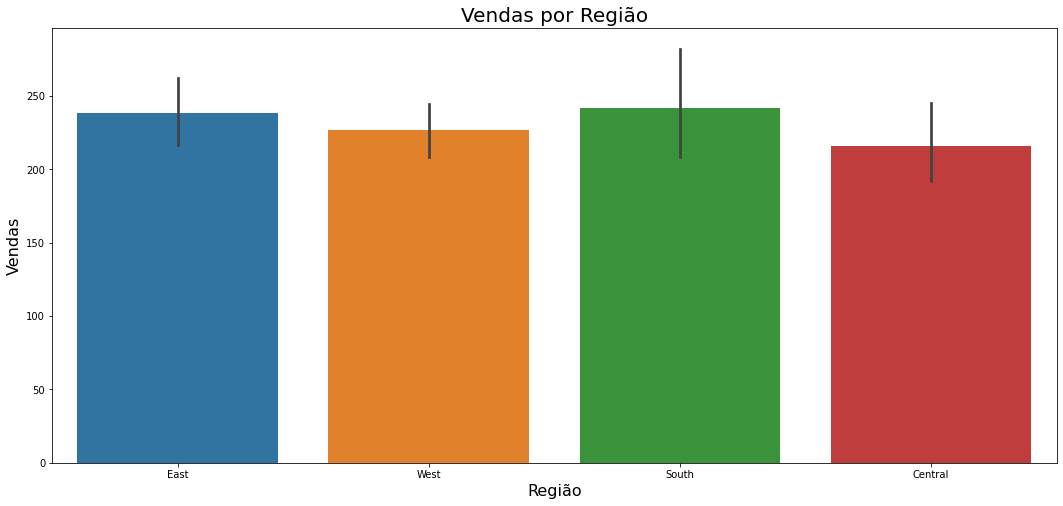

In [ ]:
bar_plot_df('Região', 'Vendas', 'Vendas por Região')

Insights sobre o negócio

Maior e menor valor de lucro por segmento

In [ ]:
# organizando os dados,sumarizando alguns valores e realizando agregações com a função pivot_table
pivot = pd.pivot_table(dfLoja, index = ['Segmento'],
                       values = 'Lucro', aggfunc = 'sum')

In [ ]:
pivot.style.format({'Lucro':'R$ {:,.0f}'})

,Lucro
Segmento,
Consumer,"R$ 134,119"
Corporate,"R$ 91,979"
Home Office,"R$ 60,299"


  Insights sobre o negócio

  Maior e menor valor de lucro por produto
  
  Os 10 produtos mais vendidos não são os mais lucrativos para o negócio

In [ ]:
pivot = pd.pivot_table(dfLoja, index = ['Subcategoria'],
                       values = 'Lucro', aggfunc = 'sum')

In [ ]:

pivot_highlight = pivot.style.format({'Lucro':'R$ {:,.0f}'})\
   .highlight_max(color='green')\
   .highlight_min(color='red')

pivot_highlight


,Lucro
Subcategoria,
Accessories,"R$ 41,937"
Appliances,"R$ 18,138"
Art,"R$ 6,528"
Binders,"R$ 30,222"
Bookcases,"R$ -3,473"
Chairs,"R$ 26,590"
Copiers,"R$ 55,618"
Envelopes,"R$ 6,964"
Fasteners,R$ 950


Usando scatterplot para avaliar a distribuição dos pedidos de ordem prioritária em cada subcategoria.

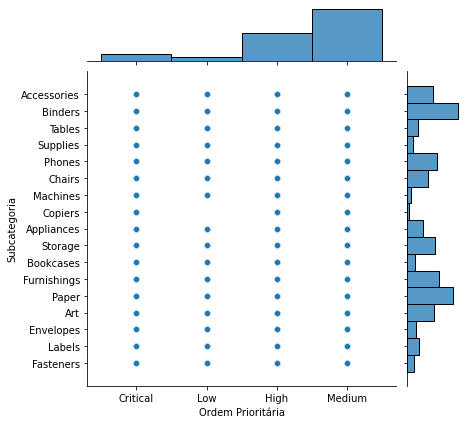

In [ ]:
#Scatterplot - Distribuição bivariada
sns.jointplot(x='Ordem Prioritária',y='Subcategoria',data= dfLoja)

In [ ]:
#Correlação entre as variavéis númericas do dataset
dfLoja.corr()

,ID da Linha,Código Postal,Vendas,Quantidade,Desconto,Lucro,Frete
ID da Linha,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497,-0.017545
Código Postal,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Vendas,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.677279
Quantidade,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253,0.221305
Desconto,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.030117
Lucro,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.283280
Frete,-0.017545,-0.025449,0.677279,0.221305,-0.030117,0.283280,1.000000


In [ ]:
#retirando colunas indesejadas para o mapa de calor
dfLoja.drop(['ID da Linha','Código Postal'],inplace=True,axis=1)

Agora vamos criar um mapa de calor para conseguir interpretar melhor os dados de forma mais visual.


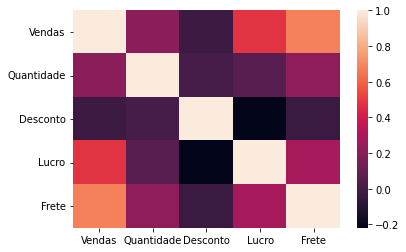

In [ ]:
sns.heatmap(dfLoja.corr())

Melhorando o mapa de calor

Vamos avaliar o quanto uma variável influencia na outra. Lembre que a correlação positiva (em azul mais forte, valores próximos a 1) mostra que quando uma variável aumenta seu valor, a outra também aumenta. Enquanto que a correlação negativa mostra que enquanto uma variável aumenta seu valor, a outra diminui (em azul mais fraco, valores próximos a -0.2).

Quando uma variável não possui correlação uma com a outra, o valor é 0.





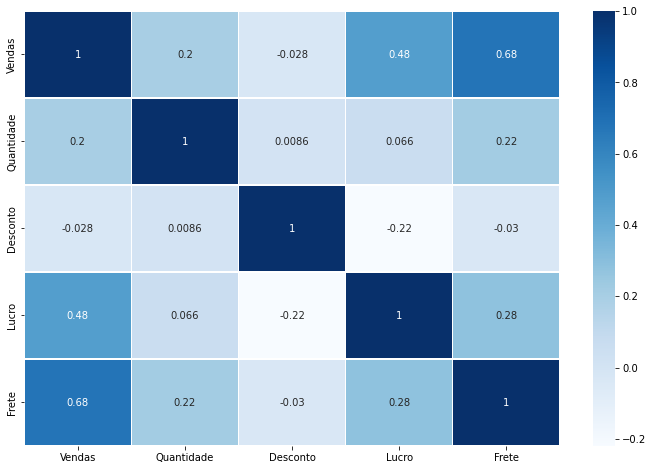

In [ ]:
fig, ax =plt.subplots(figsize =(12,8))
sns.heatmap(dfLoja.corr(),cmap='Blues',linewidth= 0.5, annot=True)

# Conclusão
Neste projeto foi possível um melhor entendimento da base de dados, identificar
comportamentos e padrões dos consumidores e responder as perguntas de negócio.

A análise dos dados permite que se compreenda o mercado e o perfil do público da sua marca, quais as tendências para seu nicho para traçar estratégias mais assertivas.
